In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from scipy import stats as st
import json
import re
from nltk.tokenize.regexp import WhitespaceTokenizer

In [2]:
GNI88 = pd.read_csv("/Users/carla/Desktop/internships/rethinkmedia/GNI88_cleaned_data.csv")

/Users/carla/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
GNI88 = GNI88[GNI88['Article Status']=='News'].reset_index(drop=True)

In [4]:
GNI88.head()

,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,Legacy Quote Tag,...,Constituent Group,Media Name,Media Medium,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group,fulltext,source_name_cleaned
0,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105520,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,None (Legacy Other),News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis
1,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105517,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,None (Legacy Other),News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis
2,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105518,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,NaN,News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Leon E. Panetta
3,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105527,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,NaN,News Week,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Chuck Hagel
4,2018-02-15,3777414,"For His Book 'Directorate S,' Journalist Steve...",7105525,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,None (Legacy Other),NPR,NaN,"Kelly, Mary",NaN,NaN,NaN,NaN,"For His Book 'Directorate S,' Journalist Steve...",Steve Coll


In [5]:
GNI88.shape

(361546, 30)

### Vader ( lexicon and rule-based sentiment analysis tool)

In [6]:
print(GNI88['QText'][0] + "\n")
print(GNI88['QText'][1] + "\n")
print(GNI88['QText'][2] + "\n")
print(GNI88['QText'][3] + "\n")
print(GNI88['QText'][4] )

I have modest expectations of my ability to predict Kim Jong Un's behavior,

the rhetoric is up to the president.

[It] could result in not only the loss of millions of lives but the possibility of a nuclear confrontation

It's been essentially transactional, but we've had a pretty stable relationship with Pakistan. You can go through the other nuclear powers as well

Now, Pakistan is a much larger population. It has a hundred-plus nuclear bombs. Its internal security is a matter of great interest to the United States because if Pakistan fell apart and its nuclear weapons fell into the wrong hands, it could be devastating. And so this was always the challenge.


In [7]:
vader = SentimentIntensityAnalyzer()
print(vader.polarity_scores(GNI88['QText'][0]))
print(vader.polarity_scores(GNI88['QText'][1]))
print(vader.polarity_scores(GNI88['QText'][2]))
print(vader.polarity_scores(GNI88['QText'][3]))
print(vader.polarity_scores(GNI88['QText'][4]))

# looks good

{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3182}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.138, 'neu': 0.793, 'pos': 0.069, 'compound': -0.3546}
{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.8674}
{'neg': 0.154, 'neu': 0.627, 'pos': 0.219, 'compound': 0.34}


In [8]:
GNI88[GNI88['Article ID'] == 52405317]['QText']

329075    "Not all of those bombers collecting data over...
329076                                                  NaN
Name: QText, dtype: object

In [9]:
# implement

GNI88 = GNI88.drop(labels=329076, axis=0)
GNI88_vader = GNI88.copy()
GNI88_vader['Quote Sentiment'] = GNI88_vader["QText"].apply(vader.polarity_scores)

In [10]:
GNI88_vader['Quote Sentiment Score'] = GNI88_vader['Quote Sentiment'].apply(lambda x: x['compound'])

def sentiment_class(x):
    if x['compound'] > 0:
        return "Positive"
    if x['compound'] < 0:
        return "Negative"
    else: 
        return "Neutral"

GNI88_vader['Quote Sentiment'] = GNI88_vader['Quote Sentiment'].apply(lambda x: sentiment_class(x))

In [11]:
GNI88_vader.head()

,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,Legacy Quote Tag,...,Media Medium,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group,fulltext,source_name_cleaned,Quote Sentiment,Quote Sentiment Score
0,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105520,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis,Positive,0.3182
1,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105517,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis,Neutral,0.0000
2,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105518,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Leon E. Panetta,Negative,-0.3546
3,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105527,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,NaN,...,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Chuck Hagel,Positive,0.8674
4,2018-02-15,3777414,"For His Book 'Directorate S,' Journalist Steve...",7105525,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,NaN,...,NaN,"Kelly, Mary",NaN,NaN,NaN,NaN,"For His Book 'Directorate S,' Journalist Steve...",Steve Coll,Positive,0.3400


In [12]:
print(np.mean(GNI88_vader['Quote Sentiment Score']))
print(np.max(GNI88_vader['Quote Sentiment Score']))
print(np.min(GNI88_vader['Quote Sentiment Score']))
print(np.argmax(GNI88_vader['Quote Sentiment Score']))
print(np.argmin(GNI88_vader['Quote Sentiment Score']))

0.007653028806924242
0.9947
-0.9976
234016
332392


In [13]:
Counter(GNI88_vader['Quote Sentiment'].tolist())

Counter({'Positive': 152191, 'Neutral': 66342, 'Negative': 143012})

In [14]:
GNI88_vader = GNI88_vader.reset_index()
print(GNI88_vader['QText'][234016] + "\n")
print(GNI88_vader['QText'][332392] + "\n")

But overall, the reality is that for America to be able to preserve our interests and to encourage freedom to spread around the world. America has to be strong. And we have to stand by our friends. And we have distance ourselves from our friends under this administration. We have to show a commitment to a strong military. This President is shrinking from our military commitments. And at the same time, we have to promote our values around the world and the President was silent when there were dissident voices that took to the streets in Iran. He should have been outspoken, aggressively supporting those voices. Likewise, with the Arab Spring now turning into an Arab winter, he has been asleep for the switch. He has been ineffective in being able to promote democracy and freedom and the free exercise of personal rights in parts of the world that are obviously critical to the stability of the world. So, this President has really failed, I think an almost every dimension of foreign policy, 

In [15]:
source_groups = {"Foreign Government": ['Foreign Gov/Mil Official'],
                "Experts": ['Nuke Organization','Non-Profit/NGO','Think Tanks',
                            'Nuke Organization - Other', 'Nuke Organization - Academic',
                            'International Orgs','Academic','Nuclear Scientist',"Analyst/Commentator",
                            'Attorney','Regulator'],
                "US Congress": ['US Rep. & Staff','US Senate & Staff', 'Partisans/Fmr. Politicians'],
                "US Federal Officials": ['Federal Official','State/Local Official',
                                        'Former Admin. Officials','Judicial Official'],
                "US Defense": ['Military','US Military','retired US Military','Defense Forces','Defense'],
                "Media": ["Media/Journalist","Blogger"],
                "Corporate Official": ['Corporate Official'],
                "Other": ['Other','Chairman','Terrorist/Extremist','Information minister',
                          'Religious/Clerical', 'Ambassador', 'Nuclear Official',
                          'Citizen','Public Polling','US Police','Deputy'
                         
                         
                         ]}

In [16]:
# Helper function that inverts a dictionary. This will be useful for using speaker groups
# later on in model evaluation
def invert_dict(dictionary):
  """Inputs:
     - dictionary: dict, dictionary we wish to invert
     Outputs:
     - dict, where keys are the initial dictionary's values and values are the initial dictionary's keys"""
  # get a list of all items in all dictionary values
  speaker_types = list(np.concatenate(list(dictionary.values())).flat)
  # each speaker type will become its own key now, and the value will be the speaker group it's a part of
  inverted_dict = {}
  for speaker_type in speaker_types:
    # find the group the speaker_type belongs in
    speaker_group = [key for key, value in dictionary.items() if speaker_type in value][0]
    # update the inverted dictionary such that the key is the speaker type and the value is the speaker group
    inverted_dict[speaker_type] = speaker_group
  return inverted_dict

In [17]:
source_to_group = invert_dict(source_groups)

In [18]:
def assign_source_to_group(source_type):
  """Inputs:
     - source_type: str, source type from quote datafame
     Outputs:
     - str of the bigger speaker category to which source_type belongs"""
  if type(source_type) != str:
    return "Other"
  try:
    return source_to_group[source_type]
  except:
    return "Other"

In [19]:
GNI88_vader['Source Type'] = GNI88_vader['Source Type'].apply(assign_source_to_group)

In [20]:
vader_FG = GNI88_vader[GNI88_vader['Source Type'] == 'Foreign Government']
vader_E = GNI88_vader[GNI88_vader['Source Type'] == 'Experts']
vader_UC = GNI88_vader[GNI88_vader['Source Type'] == 'US Congress']
vader_UF = GNI88_vader[GNI88_vader['Source Type'] == 'US Federal Officials']
vader_UD = GNI88_vader[GNI88_vader['Source Type'] == 'US Defense']
vader_M = GNI88_vader[GNI88_vader['Source Type'] == 'Media']
vader_CO = GNI88_vader[GNI88_vader['Source Type'] == 'Corporate Official']
vader_O = GNI88_vader[GNI88_vader['Source Type'] == 'Other']

0.015907881412670636


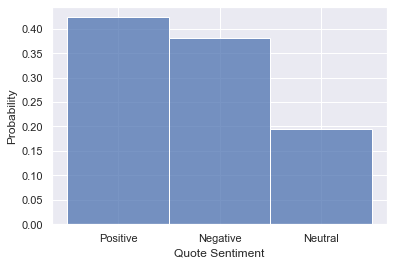

In [21]:
## Foreign Government

sns.set(style="darkgrid")
sns.set(font_scale=1)
sns.histplot(data=vader_FG, x='Quote Sentiment', stat = "probability", discrete=True) 
print(np.mean(vader_FG['Quote Sentiment Score']))

-0.013842322372699247


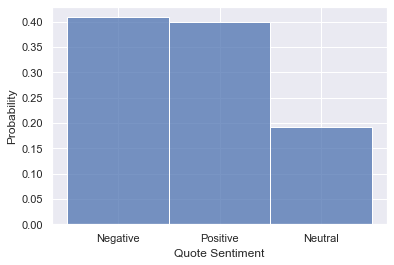

In [22]:
## Expert

sns.histplot(data=vader_E, x='Quote Sentiment', stat = "probability", discrete=True) 
print(np.mean(vader_E['Quote Sentiment Score']))

0.01812295600076945


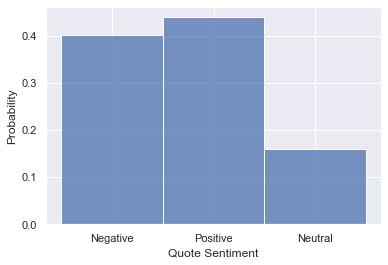

In [23]:
## US Congress

sns.histplot(data=vader_UC, x='Quote Sentiment', stat = "probability", discrete=True)
print(np.mean(vader_UC['Quote Sentiment Score']))

0.04604036624783299


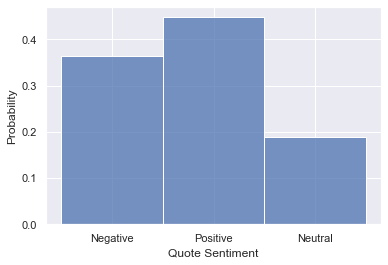

In [24]:
## US Federal Officials

sns.histplot(data=vader_UF, x='Quote Sentiment', stat = "probability", discrete=True)
print(np.mean(vader_UF['Quote Sentiment Score']))

-0.0005703279377758763


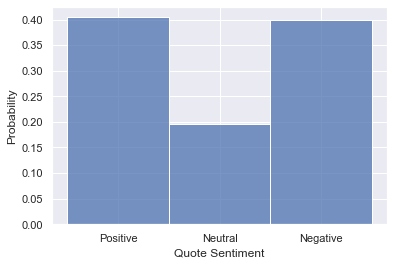

In [25]:
## US Defense

sns.histplot(data=vader_UD, x='Quote Sentiment', stat = "probability", discrete=True) 
print(np.mean(vader_UD['Quote Sentiment Score']))

-0.04436544733068746


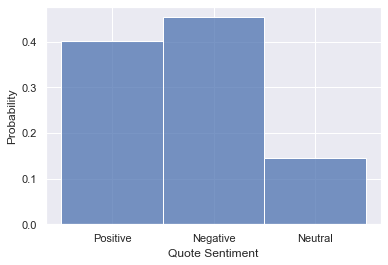

In [26]:
## Media

sns.histplot(data=vader_M, x='Quote Sentiment', stat = "probability", discrete=True) 
print(np.mean(vader_M['Quote Sentiment Score']))

0.05959628934750896


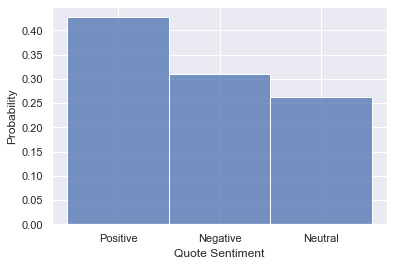

In [27]:
## Corporate Officials

sns.histplot(data=vader_CO, x='Quote Sentiment', stat = "probability", discrete=True) 
print(np.mean(vader_CO['Quote Sentiment Score']))

-0.099074422415204


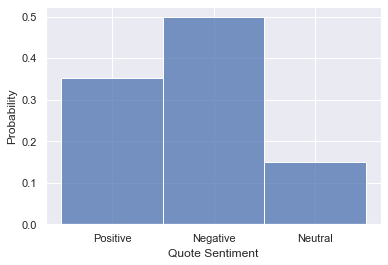

In [28]:
## Other

sns.histplot(data=vader_O, x='Quote Sentiment', stat = "probability", discrete=True) 
print(np.mean(vader_O['Quote Sentiment Score']))

### T test: if the differences in means are statistically significant

In [29]:
## Foreign Goverment v.s all

FG = vader_FG['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=FG, b=GNI88_vader['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=4.965719840714171, pvalue=6.85199350908595e-07)

In [30]:
## Expert v.s all

E = vader_E['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=E, b=GNI88_vader['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=-11.292471325737491, pvalue=1.4891137452616998e-29)

In [31]:
## US Congress v.s all

UC = vader_UC['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=UC, b=GNI88_vader['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=3.9483639135702653, pvalue=7.88108485383031e-05)

In [32]:
## US Federal Official v.s all

UF = vader_UF['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=UF, b=GNI88_vader['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=22.89508557415369, pvalue=8.149714521140886e-116)

In [33]:
## US Defense v.s all

UD = vader_UD['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=UD, b=GNI88_vader['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=-1.7672549640793282, pvalue=0.07721582847108206)

In [34]:
## Media v.s all

M = vader_M['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=M, b=GNI88_vader['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=-17.14072267212831, pvalue=1.3831483832720477e-65)

In [35]:
## Corporate Official v.s all

CO = vader_CO['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=CO, b=GNI88_vader['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=8.674449370699667, pvalue=5.5530222346632004e-18)

In [36]:
## Other v.s all

O = vader_O['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=O, b=GNI88_vader['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=-28.877640025298035, pvalue=1.078051361728296e-179)

### Longer quotes tend to be more positive/negative? 

### YES

https://medium.com/@piocalderon/vader-sentiment-analysis-explained-f1c4f9101cd9#:~:text=VADER%20

https://github.com/nltk/nltk/issues/1490

### Solutions:
### 1. take the function's inverse and divide the x by the quote length, but we will lose the [-1,1] boundaries
### 2. break down the paragraphs into sentences, take the vader scores' average
### 3. others?

In [37]:
GNI88_vader2 = GNI88_vader.copy()

In [38]:
## Try the first solution

def vader_inverse(score):
    x = np.sqrt(15*score**2/(1-score**2))
    return x
    
GNI88_vader2['Quote Sentiment Score'] = GNI88_vader2['Quote Sentiment Score'].apply(lambda x: vader_inverse(x))

In [39]:
for i in range(len(GNI88_vader2)):
    if GNI88_vader2['Quote Sentiment'][i] == 'Negative':
        GNI88_vader2['Quote Sentiment Score'][i] = -GNI88_vader2['Quote Sentiment Score'][i]
    tokens = WhitespaceTokenizer().tokenize(GNI88_vader2['QText'][i])
    quote_len = len(tokens)
    GNI88_vader2['Quote Sentiment Score'][i] = GNI88_vader2['Quote Sentiment Score'][i]/quote_len

/var/folders/tc/bh92rdln5b97ks_khyc1_kbh0000gn/T/ipykernel_77867/290167688.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GNI88_vader2['Quote Sentiment Score'][i] = GNI88_vader2['Quote Sentiment Score'][i]/quote_len
/var/folders/tc/bh92rdln5b97ks_khyc1_kbh0000gn/T/ipykernel_77867/290167688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GNI88_vader2['Quote Sentiment Score'][i] = -GNI88_vader2['Quote Sentiment Score'][i]


In [40]:
GNI88_vader2.head()

,index,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,...,Media Medium,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group,fulltext,source_name_cleaned,Quote Sentiment,Quote Sentiment Score
0,0,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105520,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,...,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis,Positive,0.099996
1,1,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105517,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,...,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis,Neutral,0.000000
2,2,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105518,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,...,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Leon E. Panetta,Negative,-0.077306
3,3,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105527,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,...,NaN,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Chuck Hagel,Positive,0.293526
4,4,2018-02-15,3777414,"For His Book 'Directorate S,' Journalist Steve...",7105525,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,...,NaN,"Kelly, Mary",NaN,NaN,NaN,NaN,"For His Book 'Directorate S,' Journalist Steve...",Steve Coll,Positive,0.027456


In [41]:
print(np.mean(GNI88_vader2['Quote Sentiment Score']))
print(np.max(GNI88_vader2['Quote Sentiment Score']))
print(np.min(GNI88_vader2['Quote Sentiment Score']))
print(np.argmax(GNI88_vader2['Quote Sentiment Score']))
print(np.argmin(GNI88_vader2['Quote Sentiment Score']))

-0.0006757708757572987
2.7001050131949005
-2.9002026819242315
151557
88318


In [42]:
GNI88_vader2 = GNI88_vader2.reset_index()
print(GNI88_vader2['QText'][151557] + "\n")
print(GNI88_vader2['QText'][88318] + "\n")

perfect

warmonger



In [43]:
vader2_FG = GNI88_vader2[GNI88_vader2['Source Type'] == 'Foreign Government']
vader2_E = GNI88_vader2[GNI88_vader2['Source Type'] == 'Experts']
vader2_UC = GNI88_vader2[GNI88_vader2['Source Type'] == 'US Congress']
vader2_UF = GNI88_vader2[GNI88_vader2['Source Type'] == 'US Federal Officials']
vader2_UD = GNI88_vader2[GNI88_vader2['Source Type'] == 'US Defense']
vader2_M = GNI88_vader2[GNI88_vader2['Source Type'] == 'Media']
vader2_CO = GNI88_vader2[GNI88_vader2['Source Type'] == 'Corporate Official']
vader2_O = GNI88_vader2[GNI88_vader2['Source Type'] == 'Other']

0.0012975553777567074


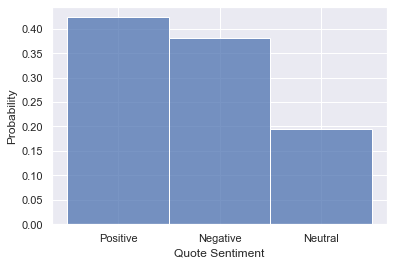

In [44]:
## Foreign Government

sns.set(style="darkgrid")
sns.set(font_scale=1)
sns.histplot(data=vader2_FG, x='Quote Sentiment', stat = "probability", discrete=True) 
print(np.mean(vader2_FG['Quote Sentiment Score']))

-0.005431944455675267


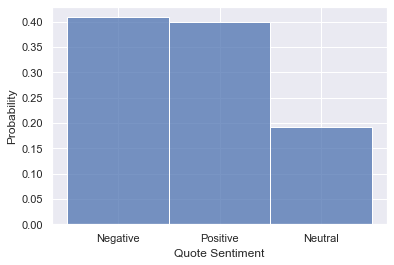

In [45]:
## Expert

sns.histplot(data=vader2_E, x='Quote Sentiment', stat = "probability", discrete=True) 
print(np.mean(vader2_E['Quote Sentiment Score']))

0.0006395610299314198


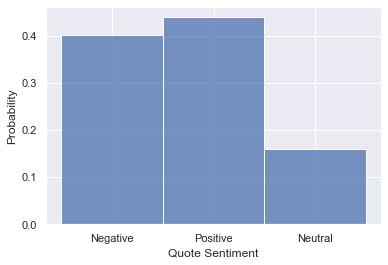

In [46]:
## US Congress

sns.histplot(data=vader2_UC, x='Quote Sentiment', stat = "probability", discrete=True)
print(np.mean(vader2_UC['Quote Sentiment Score']))

0.007992068579735856


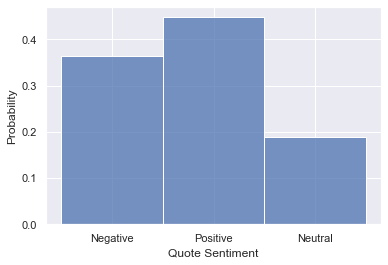

In [47]:
## US Federal Officials

sns.histplot(data=vader2_UF, x='Quote Sentiment', stat = "probability", discrete=True)
print(np.mean(vader2_UF['Quote Sentiment Score']))

-0.0027835939091769577


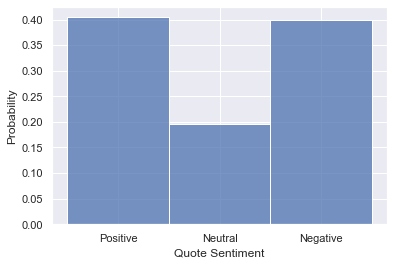

In [48]:
## US Defense

sns.histplot(data=vader2_UD, x='Quote Sentiment', stat = "probability", discrete=True) 
print(np.mean(vader2_UD['Quote Sentiment Score']))

-0.010849393369529049


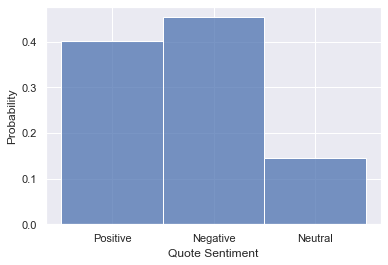

In [49]:
## Media

sns.histplot(data=vader2_M, x='Quote Sentiment', stat = "probability", discrete=True) 
print(np.mean(vader2_M['Quote Sentiment Score']))

0.012078071471569151


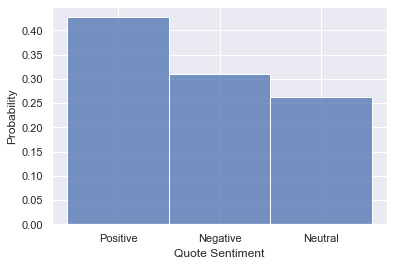

In [50]:
## Corporate Officials

sns.histplot(data=vader2_CO, x='Quote Sentiment', stat = "probability", discrete=True) 
print(np.mean(vader2_CO['Quote Sentiment Score']))

-0.02635130812981292


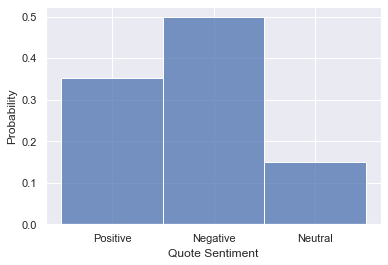

In [51]:
## Other

sns.histplot(data=vader2_O, x='Quote Sentiment', stat = "probability", discrete=True) 
print(np.mean(vader2_O['Quote Sentiment Score']))

### T test: if the differences in means are statistically significant

In [52]:
## Foreign Goverment v.s all

FG = vader2_FG['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=FG, b=GNI88_vader2['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=3.7157174237859683, pvalue=0.00020270539141837478)

In [53]:
## Expert v.s all

E = vader2_E['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=E, b=GNI88_vader2['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=-8.844739184413955, pvalue=9.312816449465367e-19)

In [54]:
## US Congress v.s all

UC = vader2_UC['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=UC, b=GNI88_vader2['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=1.6544026182888383, pvalue=0.09805299298865776)

In [55]:
## US Federal Official v.s all

UF = vader2_UF['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=UF, b=GNI88_vader2['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=17.396575408624418, pvalue=1.0192264281259353e-67)

In [56]:
## US Defense v.s all

UD = vader2_UD['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=UD, b=GNI88_vader2['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=-1.6600363417038628, pvalue=0.09693799033648602)

In [57]:
## Media v.s all

M = vader2_M['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=M, b=GNI88_vader2['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=-14.58095549987619, pvalue=5.021775115714129e-48)

In [58]:
## Corporate Official v.s all

CO = vader2_CO['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=CO, b=GNI88_vader2['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=6.946225679467687, pvalue=4.237241107389726e-12)

In [59]:
## Other v.s all

O = vader2_O['Quote Sentiment Score'].to_numpy()
st.ttest_ind(a=O, b=GNI88_vader2['Quote Sentiment Score'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=-23.977296442764036, pvalue=2.747162402822002e-125)

### Takeaway:
### 1. distributions still look the same after the normalization, and most of the mean differences are still statistically significant
### 2. plz help to check if my normalization is right. github:https://github.com/cjhutto/vaderSentiment
### 3. hard to design a cut-off now--the scores are no longer bounded

### Subjectivity

In [60]:
#Loading the MPQA Subjectivity Clues Lexicon (https://mpqa.cs.pitt.edu/lexicons/subj_lexicon/)
mpqa_dict = json.load(open("/Users/carla/Desktop/internships/rethinkmedia/mpqa_dict.json", "r"))

def get_subjectivity(art_str, mpqa_dict):
    subjectivity, adjectives, sub_adjectives = 0, 0, 0
    words = re.sub("[^\w]", " ",  art_str).split()
    
    for w in words:
        if w in mpqa_dict:  
            if mpqa_dict[w]['subj'] == 'weaksubj':
                subjectivity += 0.1
            if mpqa_dict[w]['subj'] == 'strongsubj':
                subjectivity += 1
            if mpqa_dict[w]['pos'] == 'adj' :
                adjectives += 1
                if mpqa_dict[w]['subj'] == 'weaksubj':
                    sub_adjectives += 0.1
                if mpqa_dict[w]['subj'] == 'strongsubj':
                    sub_adjectives += 1
    
    return subjectivity, sub_adjectives

#GNI88 = GNI88.drop(labels=329076, axis=0)
GNI88_sub = GNI88.copy()
GNI88_sub["subjectivity"] = GNI88_sub["QText"].apply(get_subjectivity, mpqa_dict=mpqa_dict)
GNI88_sub[['subjectivity_feature','adj_subjectivity_feature']] = pd.DataFrame(GNI88_sub["subjectivity"].tolist(), index= GNI88_sub.index)

In [61]:
GNI88_sub['Source Type'] = GNI88_sub['Source Type'].apply(assign_source_to_group)

In [62]:
GNI88_sub = GNI88_sub.reset_index()

In [63]:
for i in range(len(GNI88_sub)):
    tokens = WhitespaceTokenizer().tokenize(GNI88_sub['QText'][i])
    quote_len = len(tokens)
    GNI88_sub['subjectivity_feature'][i] = GNI88_sub['subjectivity_feature'][i]*100/quote_len
    GNI88_sub['adj_subjectivity_feature'][i] = GNI88_sub['adj_subjectivity_feature'][i]*100/quote_len

/var/folders/tc/bh92rdln5b97ks_khyc1_kbh0000gn/T/ipykernel_77867/3043663480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GNI88_sub['subjectivity_feature'][i] = GNI88_sub['subjectivity_feature'][i]*100/quote_len
/var/folders/tc/bh92rdln5b97ks_khyc1_kbh0000gn/T/ipykernel_77867/3043663480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GNI88_sub['adj_subjectivity_feature'][i] = GNI88_sub['adj_subjectivity_feature'][i]*100/quote_len


In [64]:
GNI88_sub.head()

,index,artdate,Article ID,Headline,Quote ID,Article Status,Article Position,Messages,Submessages,Quote Position,...,Journalist Name,Constituent Author,Article Issues,Custom Group,Media Group,fulltext,source_name_cleaned,subjectivity,subjectivity_feature,adj_subjectivity_feature
0,0,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105520,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,...,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis,"(0.2, 0.1)",1.538462,0.769231
1,1,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105517,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,...,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,James Mattis,"(0.1, 0)",1.428571,0.000000
2,2,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105518,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,...,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Leon E. Panetta,"(1.3, 0)",6.842105,0.000000
3,3,2018-02-23,3777413,Can James Mattis Prevent Nuclear War With Nort...,7105527,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Neutral,...,"Fryer-biggs, Zachary",NaN,NaN,NaN,NaN,Can James Mattis Prevent Nuclear War With Nort...,Chuck Hagel,"(2.2, 0)",9.565217,0.000000
4,4,2018-02-15,3777414,"For His Book 'Directorate S,' Journalist Steve...",7105525,News,Neutral,OLD Proliferation,OLD State Level Nuclear Programs,Positive,...,"Kelly, Mary",NaN,NaN,NaN,NaN,"For His Book 'Directorate S,' Journalist Steve...",Steve Coll,"(5.7, 3)",11.176471,5.882353


In [65]:
sub_FG = GNI88_sub[GNI88_sub['Source Type'] == 'Foreign Government']
sub_E = GNI88_sub[GNI88_sub['Source Type'] == 'Experts']
sub_UC = GNI88_sub[GNI88_sub['Source Type'] == 'US Congress']
sub_UF = GNI88_sub[GNI88_sub['Source Type'] == 'US Federal Officials']
sub_UD = GNI88_sub[GNI88_sub['Source Type'] == 'US Defense']
sub_M = GNI88_sub[GNI88_sub['Source Type'] == 'Media']
sub_CO = GNI88_sub[GNI88_sub['Source Type'] == 'Corporate Official']
sub_O = GNI88_sub[GNI88_sub['Source Type'] == 'Other']

6.52472005779592


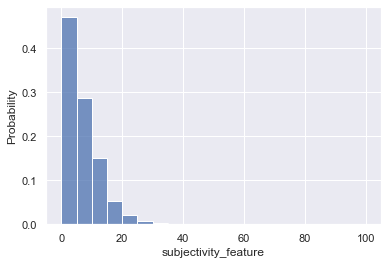

In [66]:
## Foreign Government

sns.set(style="darkgrid")
sns.set(font_scale=1)
sns.histplot(data=sub_FG, x='subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_FG['subjectivity_feature']))

1.5362265724957611


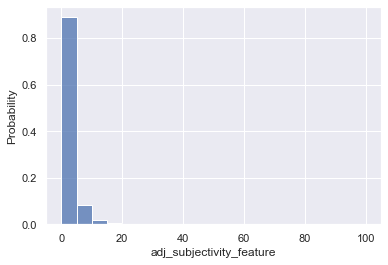

In [67]:
sns.histplot(data=sub_FG, x='adj_subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_FG['adj_subjectivity_feature']))

6.778301238875614


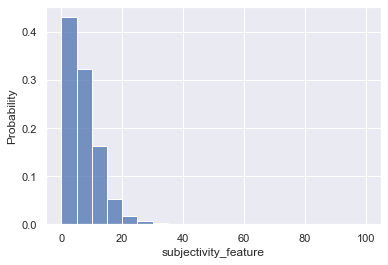

In [68]:
## Expert

sns.histplot(data=sub_E, x='subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_E['subjectivity_feature']))

1.5100368536067137


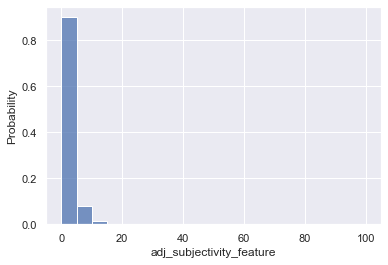

In [69]:
sns.histplot(data=sub_E, x='adj_subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_E['adj_subjectivity_feature']))

8.080674535488036


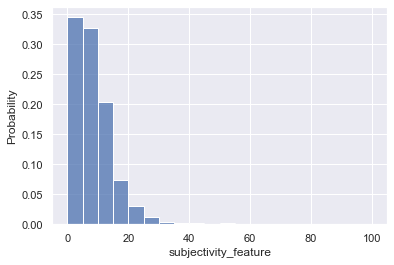

In [70]:
## US Congress

sns.histplot(data=sub_UC, x='subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_UC['subjectivity_feature']))

1.726354666616209


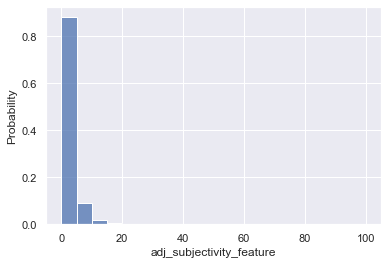

In [71]:
sns.histplot(data=sub_UC, x='adj_subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_UC['adj_subjectivity_feature']))

6.910380231388709


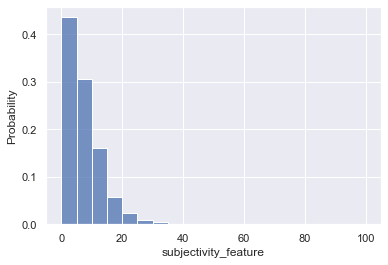

In [72]:
## US Federal Official

sns.histplot(data=sub_UF, x='subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_UF['subjectivity_feature']))

1.5213354125564447


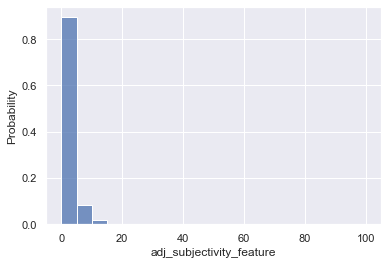

In [73]:
sns.histplot(data=sub_UF, x='adj_subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_UF['adj_subjectivity_feature']))

6.25660814976687


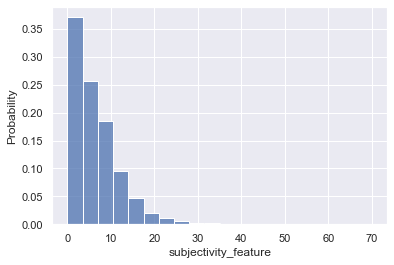

In [74]:
## US Defense 

sns.histplot(data=sub_UD, x='subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_UD['subjectivity_feature']))

1.4053842238866079


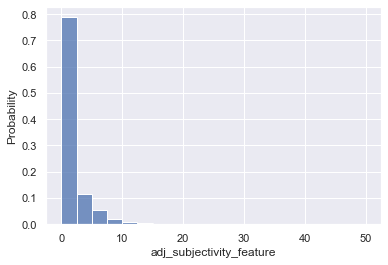

In [75]:
sns.histplot(data=sub_UD, x='adj_subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_UD['adj_subjectivity_feature']))

6.5539225728055515


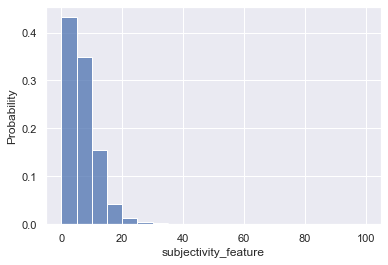

In [76]:
## Media

sns.histplot(data=sub_M, x='subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_M['subjectivity_feature']))

1.3383916380281367


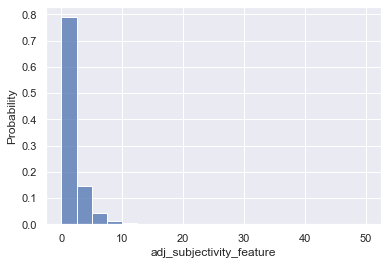

In [77]:
sns.histplot(data=sub_M, x='adj_subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_M['adj_subjectivity_feature']))

5.938892520614692


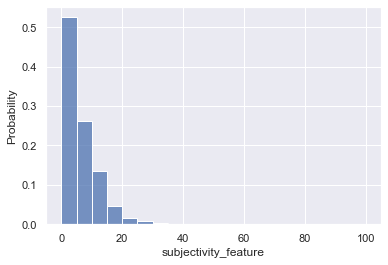

In [78]:
## Corporate Official

sns.histplot(data=sub_CO, x='subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_CO['subjectivity_feature']))

1.3105643242408085


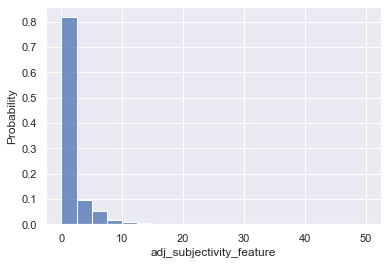

In [79]:
sns.histplot(data=sub_CO, x='adj_subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_CO['adj_subjectivity_feature']))

6.327211944351584


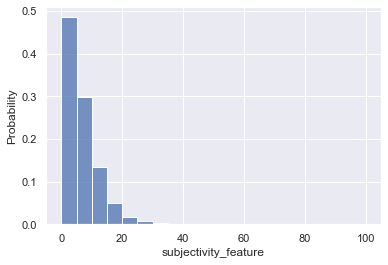

In [80]:
## Other

sns.histplot(data=sub_O, x='subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_O['subjectivity_feature']))

1.4763394977328779


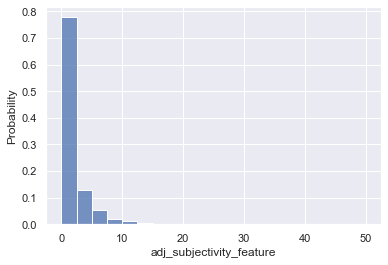

In [81]:
sns.histplot(data=sub_O, x='adj_subjectivity_feature', stat = "probability", bins = 20) 
print(np.mean(sub_O['adj_subjectivity_feature']))

### T test: if the differences in means are statistically significant

In [82]:
## Foreign Goverment v.s all

FG = sub_FG['subjectivity_feature'].to_numpy()
st.ttest_ind(a=FG, b=GNI88_sub['subjectivity_feature'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=-12.379138301146456, pvalue=3.52894978271164e-35)

In [83]:
## Expert v.s all

E = sub_E['subjectivity_feature'].to_numpy()
st.ttest_ind(a=E, b=GNI88_sub['subjectivity_feature'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=-1.3220659799891181, pvalue=0.18614911686484406)

In [84]:
## US Congress v.s all

UC = sub_UC['subjectivity_feature'].to_numpy()
st.ttest_ind(a=UC, b=GNI88_sub['subjectivity_feature'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=34.70219701554458, pvalue=2.8976478748022972e-260)

In [85]:
## US Federal Official v.s all

UF = sub_UF['subjectivity_feature'].to_numpy()
st.ttest_ind(a=UF, b=GNI88_sub['subjectivity_feature'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=4.324777688303259, pvalue=1.5278435854010176e-05)

In [86]:
## US Defense v.s all

UD = sub_UD['subjectivity_feature'].to_numpy()
st.ttest_ind(a=UD, b=GNI88_sub['subjectivity_feature'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=-9.179304883099796, pvalue=5.188601532392887e-20)

In [87]:
## Media v.s all

M = sub_M['subjectivity_feature'].to_numpy()
st.ttest_ind(a=M, b=GNI88_sub['subjectivity_feature'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=-7.7741662494373385, pvalue=7.791122362623432e-15)

In [88]:
## Corporate Official v.s all

CO = sub_CO['subjectivity_feature'].to_numpy()
st.ttest_ind(a=CO, b=GNI88_sub['subjectivity_feature'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=-9.369009663236003, pvalue=1.0877770935241028e-20)

In [89]:
## Other v.s all

O = sub_O['subjectivity_feature'].to_numpy()
st.ttest_ind(a=O, b=GNI88_sub['subjectivity_feature'].to_numpy(), equal_var=False)

Ttest_indResult(statistic=-10.463143734874356, pvalue=1.4815251082696736e-25)

### Takeaway:
### 1. Each speaker type shows a different distribution of subjectivity scores
### 2. Most of the differences in their mean scores are statistically significant
### 3. The adj subjectivity scores generally have the same trends as their corresponding subjectivity scores, I didn't do t-test on them since I think they are highly correlated with subjectivity scores, so the conclusions are transferrable. 